## Model Building

In [1]:
# Import all ncecssary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import re
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot
import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_validate
from sklearn.preprocessing import StandardScaler
import warnings

In [2]:
# set global parameters

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
warnings.filterwarnings('ignore')
sns.set_style('darkgrid', {'grid.color':'red'})
pd.set_option('display.max_colwidth', None)
warnings.filterwarnings('ignore')

In [646]:
# Import the data that we made ready after EDA

df = pd.read_csv('./Data/cos_predict.csv')

In [647]:
# Get the glimpse of the data

df.head()

,cust_id,food_category,food_department,food_family,store_sales,store_cost,unit_sales,promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at_home,avg. yearly_income,num_children_at_home,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,65071346592,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,10064765048,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,62462698215,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,0.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,27668406698,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,30621230049,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [648]:
# Display shape of the data

df.shape

(60428, 40)

### Encoding of categorical variables
We discovered during EDA that our dataset doesn't show linear behaviour when we analyzed and looked at
the correlation map and relationship of target variable with various other continuous features. So We are
aiming for the Tree Based model.

#### One-hot encoding

In [8]:
# Perform one hot encoding of the Food category level variables -
# food_category
# food_department
# food_family

df = pd.get_dummies(df, prefix=None,columns=['food_category'])
df = pd.get_dummies(df, prefix=None,columns=['food_department'])
df = pd.get_dummies(df, prefix=None,columns=['food_family'])

In [11]:
# Perform one-hot encoding of campaign ad level variables and customer attributes such as -
# promotion_name
# sales_country
# marital_status
# gender
# education
# member_card
# occupation
# houseowner
# store_type
# store_city
# store_state
# media_type

df = pd.get_dummies(df, prefix=None,columns=['promotion_name'])
df = pd.get_dummies(df, prefix=None,columns=['sales_country'])
df = pd.get_dummies(df, prefix=None,columns=['marital_status'])
df = pd.get_dummies(df, prefix=None,columns=['gender'])
df = pd.get_dummies(df, prefix=None,columns=['education'])
df = pd.get_dummies(df, prefix=None,columns=['member_card'])
df = pd.get_dummies(df, prefix=None,columns=['occupation'])
df = pd.get_dummies(df, prefix=None,columns=['houseowner'])
df = pd.get_dummies(df, prefix=None,columns=['store_type'])
df = pd.get_dummies(df, prefix=None,columns=['store_city'])
df = pd.get_dummies(df, prefix=None,columns=['store_state'])
df = pd.get_dummies(df, prefix=None,columns=['media_type'])

In [14]:
# Shape of data after one-hot encoding

df.shape

(60428, 214)

In [15]:
# Get the glimpse of the data after one-hot encoding

df.head()

,cust_id,store_sales,store_cost,unit_sales,total_children,avg_cars_at_home,avg. yearly_income,num_children_at_home,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost,food_category_Baking Goods,food_category_Bathroom Products,food_category_Beer and Wine,food_category_Bread,food_category_Breakfast Foods,food_category_Candles,food_category_Candy,food_category_Canned Anchovies,food_category_Canned Clams,food_category_Canned Oysters,food_category_Canned Sardines,food_category_Canned Shrimp,food_category_Canned Soup,food_category_Canned Tuna,food_category_Carbonated Beverages,food_category_Cleaning Supplies,food_category_Cold Remedies,food_category_Dairy,food_category_Decongestants,food_category_Drinks,food_category_Eggs,food_category_Electrical,food_category_Frozen Desserts,food_category_Frozen Entrees,food_category_Fruit,food_category_Hardware,food_category_Hot Beverages,food_category_Hygiene,food_category_Jams and Jellies,food_category_Kitchen Products,food_category_Magazines,food_category_Meat,food_category_Miscellaneous,food_category_Packaged Vegetables,food_category_Pain Relievers,food_category_Paper Products,food_category_Pizza,food_category_Plastic Products,food_category_Pure Juice Beverages,food_category_Seafood,food_category_Side Dishes,food_category_Snack Foods,food_category_Specialty,food_category_Starchy Foods,food_category_Vegetables,food_department_Alcoholic Beverages,food_department_Baked Goods,food_department_Baking Goods,food_department_Beverages,food_department_Breakfast Foods,food_department_Canned Foods,food_department_Canned Products,food_department_Carousel,food_department_Checkout,food_department_Dairy,food_department_Deli,food_department_Eggs,food_department_Frozen Foods,food_department_Health and Hygiene,food_department_Household,food_department_Meat,food_department_Periodicals,food_department_Produce,food_department_Seafood,food_department_Snack Foods,food_department_Snacks,food_department_Starchy Foods,food_family_Drink,food_family_Food,food_family_Non-Consumable,promotion_name_Bag Stuffers,promotion_name_Best Savings,promotion_name_Big Promo,promotion_name_Big Time Discounts,promotion_name_Big Time Savings,promotion_name_Bye Bye Baby,promotion_name_Cash Register Lottery,promotion_name_Coupon Spectacular,promotion_name_Dimes Off,promotion_name_Dollar Cutters,promotion_name_Dollar Days,promotion_name_Double Down Sale,promotion_name_Double Your Savings,promotion_name_Fantastic Discounts,promotion_name_Free For All,promotion_name_Go For It,promotion_name_Green Light Days,promotion_name_Green Light Special,promotion_name_High Roller Savings,promotion_name_I Cant Believe It Sale,promotion_name_Money Savers,promotion_name_Mystery Sale,promotion_name_One Day Sale,promotion_name_Pick Your Savings,promotion_name_Price Cutters,promotion_name_Price Destroyers,promotion_name_Price Savers,promotion_name_Price Slashers,promotion_name_Price Smashers,promotion_name_Price Winners,promotion_name_Sale Winners,promotion_name_Sales Days,promotion_name_Sales Galore,promotion_name_Save-It Sale,promotion_name_Saving Days,promotion_name_Savings Galore,promotion_name_Shelf Clearing Days,promotion_name_Shelf Emptiers,promotion_name_Super Duper Savers,promotion_name_Super Savers,promotion_name_Super Wallet Savers,promotion_name_Three for One,promotion_name_Tip Top Savings,promotion_name_Two Day Sale,promotion_name_Two for One,promotion_name_Unbeatable Price Savers,promotion_name_Wallet Savers,promotion_name_Weekend Markdown,promotion_name_You Save Days,sales_country_Canada,sales_country_Mexico,sales_country_USA,marital_status_M,marital_status_S,gender_F,gender_M,education_Bachelors Degree,education_Graduate Degree,education_High School Degree,education_Partial College,education_Partial High School,member_card_Bronze,member_card_Golden,member_card_Normal,member_card_Silver,occupation_Clerical,occupat

In [16]:
# Performing encoding of avg. yearly_income by splitting the range into min and max income

df.loc[df['avg. yearly_income']=='$150K +','avg. yearly_income'] = '$150K - $150K'
df['avg_yearly_income'] = df['avg. yearly_income'].str.replace('K','')
df['avg_yearly_income'] = df['avg_yearly_income'].str.replace('$','')
df['min_income'] = df['avg_yearly_income'].str.split('-').apply(lambda x: x[0])
df['max_income'] = df['avg_yearly_income'].str.split('-').apply(lambda x: x[1])

In [19]:
# Perform target encoding for brand_name as the unique categories are 111
df_brandperc = df['brand_name'].value_counts()/df.shape[0]*100
df_brandperc = df_brandperc.reset_index()
df_brandperc = df_brandperc.rename(columns={'index':'brand_name','brand_name':'brand_perc'})

# Store the target encoded brand lable for mapping purpose 
brand_label0 = df_brandperc.loc[df_brandperc['brand_perc'] < 1]['brand_name']
brand_label1 = df_brandperc.loc[(df_brandperc['brand_perc'] >= 1) &
                                (df_brandperc['brand_perc'] < 2)]['brand_name']
brand_label2 = df_brandperc.loc[(df_brandperc['brand_perc'] >= 2) &
                                (df_brandperc['brand_perc'] < 3)]['brand_name']
brand_label3 = df_brandperc.loc[(df_brandperc['brand_perc'] >= 3) &
                                (df_brandperc['brand_perc'] < 4)]['brand_name']

# Merge the target encoded values with main dataframe
df = pd.merge(df, df_brandperc,on='brand_name',how='left')

In [23]:
# Perform one-hot encoding of target encoded variable brand_name

def get_brand_label(x):
    if x < 1:
        return 'brand_0'
    elif x >= 1 and x < 2:
        return 'brand_1'
    elif x >= 2 and x < 3:
        return 'brand_2'
    else:
        return 'brand_3'

df['brand_label'] = df['brand_perc'].apply(lambda x: get_brand_label(x))
df = pd.get_dummies(df, prefix=None,columns=['brand_label'])

In [35]:
# Get the glimpse of the data after one-hot encoding of brand_name
df.head()

,cust_id,store_sales,store_cost,unit_sales,total_children,avg_cars_at_home,avg. yearly_income,num_children_at_home,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost,food_category_Baking Goods,food_category_Bathroom Products,food_category_Beer and Wine,food_category_Bread,food_category_Breakfast Foods,food_category_Candles,food_category_Candy,food_category_Canned Anchovies,food_category_Canned Clams,food_category_Canned Oysters,food_category_Canned Sardines,food_category_Canned Shrimp,food_category_Canned Soup,food_category_Canned Tuna,food_category_Carbonated Beverages,food_category_Cleaning Supplies,food_category_Cold Remedies,food_category_Dairy,food_category_Decongestants,food_category_Drinks,food_category_Eggs,food_category_Electrical,food_category_Frozen Desserts,food_category_Frozen Entrees,food_category_Fruit,food_category_Hardware,food_category_Hot Beverages,food_category_Hygiene,food_category_Jams and Jellies,food_category_Kitchen Products,food_category_Magazines,food_category_Meat,food_category_Miscellaneous,food_category_Packaged Vegetables,food_category_Pain Relievers,food_category_Paper Products,food_category_Pizza,food_category_Plastic Products,food_category_Pure Juice Beverages,food_category_Seafood,food_category_Side Dishes,food_category_Snack Foods,food_category_Specialty,food_category_Starchy Foods,food_category_Vegetables,food_department_Alcoholic Beverages,food_department_Baked Goods,food_department_Baking Goods,food_department_Beverages,food_department_Breakfast Foods,food_department_Canned Foods,food_department_Canned Products,food_department_Carousel,food_department_Checkout,food_department_Dairy,food_department_Deli,food_department_Eggs,food_department_Frozen Foods,food_department_Health and Hygiene,food_department_Household,food_department_Meat,food_department_Periodicals,food_department_Produce,food_department_Seafood,food_department_Snack Foods,food_department_Snacks,food_department_Starchy Foods,food_family_Drink,food_family_Food,food_family_Non-Consumable,promotion_name_Bag Stuffers,promotion_name_Best Savings,promotion_name_Big Promo,promotion_name_Big Time Discounts,promotion_name_Big Time Savings,promotion_name_Bye Bye Baby,promotion_name_Cash Register Lottery,promotion_name_Coupon Spectacular,promotion_name_Dimes Off,promotion_name_Dollar Cutters,promotion_name_Dollar Days,promotion_name_Double Down Sale,promotion_name_Double Your Savings,promotion_name_Fantastic Discounts,promotion_name_Free For All,promotion_name_Go For It,promotion_name_Green Light Days,promotion_name_Green Light Special,promotion_name_High Roller Savings,promotion_name_I Cant Believe It Sale,promotion_name_Money Savers,promotion_name_Mystery Sale,promotion_name_One Day Sale,promotion_name_Pick Your Savings,promotion_name_Price Cutters,promotion_name_Price Destroyers,promotion_name_Price Savers,promotion_name_Price Slashers,promotion_name_Price Smashers,promotion_name_Price Winners,promotion_name_Sale Winners,promotion_name_Sales Days,promotion_name_Sales Galore,promotion_name_Save-It Sale,promotion_name_Saving Days,promotion_name_Savings Galore,promotion_name_Shelf Clearing Days,promotion_name_Shelf Emptiers,promotion_name_Super Duper Savers,promotion_name_Super Savers,promotion_name_Super Wallet Savers,promotion_name_Three for One,promotion_name_Tip Top Savings,promotion_name_Two Day Sale,promotion_name_Two for One,promotion_name_Unbeatable Price Savers,promotion_name_Wallet Savers,promotion_name_Weekend Markdown,promotion_name_You Save Days,sales_country_Canada,sales_country_Mexico,sales_country_USA,marital_status_M,marital_status_S,gender_F,gender_M,education_Bachelors Degree,education_Graduate Degree,education_High School Degree,education_Partial College,education_Partial High School,member_card_Bronze,member_card_Golden,member_card_Normal,member_card_Silver,occupation_Clerical,occupat

In [36]:
# Drop the columns which were created as an intermediate columns during encodings

df = df.drop(['cust_id',
              'avg. yearly_income',
              'avg_yearly_income',
              'brand_name',
              'brand_perc',
              'marital_status_M',
              'gender_F',
              'houseowner_N'
              ], axis=1)

In [37]:
# Get the glimpse of the data after dropping the columns

df.head()

,store_sales,store_cost,unit_sales,total_children,avg_cars_at_home,num_children_at_home,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost,food_category_Baking Goods,food_category_Bathroom Products,food_category_Beer and Wine,food_category_Bread,food_category_Breakfast Foods,food_category_Candles,food_category_Candy,food_category_Canned Anchovies,food_category_Canned Clams,food_category_Canned Oysters,food_category_Canned Sardines,food_category_Canned Shrimp,food_category_Canned Soup,food_category_Canned Tuna,food_category_Carbonated Beverages,food_category_Cleaning Supplies,food_category_Cold Remedies,food_category_Dairy,food_category_Decongestants,food_category_Drinks,food_category_Eggs,food_category_Electrical,food_category_Frozen Desserts,food_category_Frozen Entrees,food_category_Fruit,food_category_Hardware,food_category_Hot Beverages,food_category_Hygiene,food_category_Jams and Jellies,food_category_Kitchen Products,food_category_Magazines,food_category_Meat,food_category_Miscellaneous,food_category_Packaged Vegetables,food_category_Pain Relievers,food_category_Paper Products,food_category_Pizza,food_category_Plastic Products,food_category_Pure Juice Beverages,food_category_Seafood,food_category_Side Dishes,food_category_Snack Foods,food_category_Specialty,food_category_Starchy Foods,food_category_Vegetables,food_department_Alcoholic Beverages,food_department_Baked Goods,food_department_Baking Goods,food_department_Beverages,food_department_Breakfast Foods,food_department_Canned Foods,food_department_Canned Products,food_department_Carousel,food_department_Checkout,food_department_Dairy,food_department_Deli,food_department_Eggs,food_department_Frozen Foods,food_department_Health and Hygiene,food_department_Household,food_department_Meat,food_department_Periodicals,food_department_Produce,food_department_Seafood,food_department_Snack Foods,food_department_Snacks,food_department_Starchy Foods,food_family_Drink,food_family_Food,food_family_Non-Consumable,promotion_name_Bag Stuffers,promotion_name_Best Savings,promotion_name_Big Promo,promotion_name_Big Time Discounts,promotion_name_Big Time Savings,promotion_name_Bye Bye Baby,promotion_name_Cash Register Lottery,promotion_name_Coupon Spectacular,promotion_name_Dimes Off,promotion_name_Dollar Cutters,promotion_name_Dollar Days,promotion_name_Double Down Sale,promotion_name_Double Your Savings,promotion_name_Fantastic Discounts,promotion_name_Free For All,promotion_name_Go For It,promotion_name_Green Light Days,promotion_name_Green Light Special,promotion_name_High Roller Savings,promotion_name_I Cant Believe It Sale,promotion_name_Money Savers,promotion_name_Mystery Sale,promotion_name_One Day Sale,promotion_name_Pick Your Savings,promotion_name_Price Cutters,promotion_name_Price Destroyers,promotion_name_Price Savers,promotion_name_Price Slashers,promotion_name_Price Smashers,promotion_name_Price Winners,promotion_name_Sale Winners,promotion_name_Sales Days,promotion_name_Sales Galore,promotion_name_Save-It Sale,promotion_name_Saving Days,promotion_name_Savings Galore,promotion_name_Shelf Clearing Days,promotion_name_Shelf Emptiers,promotion_name_Super Duper Savers,promotion_name_Super Savers,promotion_name_Super Wallet Savers,promotion_name_Three for One,promotion_name_Tip Top Savings,promotion_name_Two Day Sale,promotion_name_Two for One,promotion_name_Unbeatable Price Savers,promotion_name_Wallet Savers,promotion_name_Weekend Markdown,promotion_name_You Save Days,sales_country_Canada,sales_country_Mexico,sales_country_USA,marital_status_S,gender_M,education_Bachelors Degree,education_Graduate Degree,education_High School Degree,education_Partial College,education_Partial High School,member_card_Bronze,member_card_Golden,member_card_Normal,member_card_Silver,occupation_Clerical,occupation_Management,occupation_Manual,occupation_Professional,occupat

In [38]:
# Get the shape of the data

df.shape

(60428, 214)

#### Model building and Hypertunning

In [413]:
# Import all the necessary libraries from sci-kit learn

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score

In [40]:
# Define performance function to get MAE, RMSE, MAPE, R2

def performance(actual, predicted):
    print('MAE  : ', round(mae(actual, predicted), 3))
    print('RMSE : ', round(mse(actual, predicted)**0.5, 3)) 
    print('MAPE : ', round(mape(actual, predicted), 3))
    print('R2   : ', round(r2_score(actual, predicted), 3))

In [41]:
# Create input and output variables

X = df.drop(['cost'], axis=1)
y = df['cost']

In [42]:
# Split the data into the train and test samples

# 0.20 * 1 = 0.20 : Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
# Print the shape of the train and test datasets

print('X_train: ', X_train.shape)
#print('X_val  : ', X_val.shape)
print('X_test : ', X_test.shape)
print()
print('y_train: ', y_train.shape)
#print('y_val  : ', y_val.shape)
print('y_test : ', y_test.shape)

X_train:  (48342, 213)
X_test :  (12086, 213)

y_train:  (48342,)
y_test :  (12086,)


In [44]:
# Define the function to get the feature importance of the ML model

def get_featureImportance(model,dtf):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    names = [dtf.columns[i] for i in indices]
    feature_importance = pd.DataFrame()
    feature_importance['features'] = names
    feature_importance['importance'] = importances
    feature_importance = feature_importance.sort_values(['importance'], ascending=False)
    return feature_importance

# Function to plot the feature importance

def plot_featureImportance(dtf):
    plt.figure(figsize=(18,6))
    plt.title('Feature Importancebarplot')
    sns.barplot(data=dtf,
                x = 'importance',
                y = 'features',
                palette='crest')
    plt.show()

#### Bagging - RandomForest Regressor

In [33]:
# Build and train the RandomForest regressor model on default parameters

rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [34]:
# Predict the results

y_pred = rf.predict(X_test)

In [35]:
# Test the performance of the model

performance(y_test, y_pred)

MAE  :  0.052
RMSE :  0.777
MAPE :  0.0
R2   :  0.999


The performance of the RandomForest Regressor with default parameters is too good to believe.

In [76]:
# Check the params that gave us R2 of 0.99

rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

#### Hypertuning

In [46]:
# Since, the R2 of 0.99 is too good to believe we would like to manually set the dpeth of the tree
# and then build the model and perform the test. This is an effort to make sure our model makes
# practical sense and doesn't become the victim of overfit.
# Perform the cross validation test using n_estimators = 1000, 2000, 3000 and max depth = 3

grid = { 
    'n_estimators': [1000,2000,3000],
#    'max_features': ['sqrt','log2'],
    'max_depth' : [3],
    'random_state' : [42],
#    'ccp_alpha':[0.01,0.02,0.03]
}
## show start time
dt1 = datetime.datetime.now()
print(dt1)
## Grid Search function
Tune7_CV_rfr = GridSearchCV(estimator=RandomForestRegressor(),
                      param_grid=grid,
                      cv= 5,
                      n_jobs=-1)

Tune7_CV_rfr.fit(X_train, y_train)
## show end time
dt2 = datetime.datetime.now()
print(dt2)
print('Time taken to train : ', (dt2-dt1))
print('Best Params : ', Tune7_CV_rfr.best_params_)
print('Best Score  : ', Tune7_CV_rfr.best_score_)

2023-03-17 21:02:59.091310
2023-03-17 21:46:19.954555
Time taken to train :  0:43:20.863245
Best Params :  {'max_depth': 3, 'n_estimators': 2000, 'random_state': 42}
Best Score  :  0.11652469713332694


Observation: We can see that the model with 2000 trees and depth of 3 gave the best results.
But the results are not at all satisfactory since the validation accuracy is just 11% meaning that our
model performance is off by 89%.

In [48]:
# Now we would like to test how much does the accuracy change if we reduce the number of estimators from
# 2000 to 1000 and surprisingly there is no significant difference. This gives us the inference that 
# keeping higher number of trees while building the model won't be of that much help to us.

grid = { 
    'n_estimators': [1000],
#    'max_features': ['sqrt','log2'],
    'max_depth' : [3],
    'random_state' : [42],
#    'ccp_alpha':[0.01,0.02,0.03]
}
## show start time
dt1 = datetime.datetime.now()
print(dt1)
## Grid Search function
Tune7_CV_rfr = GridSearchCV(estimator=RandomForestRegressor(),
                      param_grid=grid,
                      cv= 5,
                      n_jobs=-1)

Tune7_CV_rfr.fit(X_train, y_train)
## show end time
dt2 = datetime.datetime.now()
print(dt2)
print('Time taken to train : ', (dt2-dt1))
print('Best Params : ', Tune7_CV_rfr.best_params_)
print('Best Score  : ', Tune7_CV_rfr.best_score_)

2023-03-18 01:34:14.994828
2023-03-18 01:44:24.698124
Time taken to train :  0:10:09.703296
Best Params :  {'max_depth': 3, 'n_estimators': 1000, 'random_state': 42}
Best Score  :  0.1161871991433168


We can notice that after reducing the model estimators from 2000 to 1000 there is no significant change
in the accuracy. The accuracy is still at 11%. This is good inference for us that keeping higher number
of trees won't be a good idea here. This will unnecessarily increase the model training time and will
make the model complex.

#### Sparsity Control
We noticed that the RandomForest Regressor is not able to learn the features properly and gave the accuracy
as bad as 11% even after doing the hypertuning. We again noticed that if the depth of the tree increases then
the model performance also goes up. This could very well be due to the sparse features created after one-hot 
encoding. We are going to look at the sparse features and how their model performance gets affected with the
different percentages of the sparsity in the data.

In [84]:
# Define the function that will return the x% of sparse features along with the raw/original features
# Input parameters to the function are -
# X_train - Train set
# Sparsity list - List of all the sparse columns created after one-hot encoding
# Sparsity ratio - Percentage of sparse columns to be considered for model training

def sparcity_control(xtrain, sparcity_list, sparcity_ratio):
    ncols = np.int16(np.floor(len(sparcity_list)*sparcity_ratio))
    sparcity_list = sparcity_list[0:ncols+1]
    raw_cols = list(xtrain.columns)[0:21]
    
    final_cols = raw_cols + sparcity_list
    return final_cols

In [65]:
# Create the sparsity

sparcity_list = list(X_train.columns[21:])

#### Hypertuning with sparsity ratio

Sparcity Ratio      : 0.0
X_train.shape       : (48342, 22)
X_test.shape        : (12086, 22)
Time taken to train :  0:03:41.249400
Best Params         :  {'max_depth': 3, 'n_estimators': 1000, 'random_state': 42}
Best Score          :  0.04339776274497629
-----------------------------------------------------------------
Sparcity Ratio      : 0.1
X_train.shape       : (48342, 41)
X_test.shape        : (12086, 41)
Time taken to train :  0:03:57.629907
Best Params         :  {'max_depth': 3, 'n_estimators': 1000, 'random_state': 42}
Best Score          :  0.04338101771266105
-----------------------------------------------------------------
Sparcity Ratio      : 0.2
X_train.shape       : (48342, 60)
X_test.shape        : (12086, 60)
Time taken to train :  0:04:59.134900
Best Params         :  {'max_depth': 3, 'n_estimators': 1000, 'random_state': 42}
Best Score          :  0.04337484661792481
-----------------------------------------------------------------
Sparcity Ratio      : 0.3000000

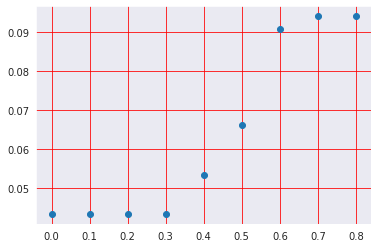

In [78]:
# Train and cross-validate the model for different sparsity ratios such as -
# 0%, 10%, 20%, 30%, 40%, 50%, 60%, 70% and 80%

sparcity_ratio = []
r2_score = []
for i in np.arange(0,0.81,0.10):
    final_cols = sparcity_control(X_train, sparcity_list, i)
    X_train_temp = X_train[final_cols]
    X_test_temp = X_test[final_cols]
    print('Sparcity Ratio      :',i)
    print('X_train.shape       :',X_train_temp.shape)
    print('X_test.shape        :',X_test_temp.shape)
    
    grid = { 
    'n_estimators': [1000],
    'max_depth' : [3],
    'random_state' : [42],
    }
    ## show start time
    dt1 = datetime.datetime.now()
    #print('Start Time:',dt1)
    ## Grid Search function
    Tune7_CV_rfr = GridSearchCV(estimator=RandomForestRegressor(),
                          param_grid=grid,
                          cv= 5,
                          n_jobs=-1)

    Tune7_CV_rfr.fit(X_train_temp, y_train)
    ## show end time
    dt2 = datetime.datetime.now()
    #print('End Time  :',dt2)
    print('Time taken to train : ', (dt2-dt1))
    print('Best Params         : ', Tune7_CV_rfr.best_params_)
    print('Best Score          : ', Tune7_CV_rfr.best_score_)
    sparcity_ratio.append(i)
    r2_score.append(Tune7_CV_rfr.best_score_)
    print('-----------------------------------------------------------------')
plt.scatter(sparcity_ratio, r2_score)
plt.show()

We can notice that, sparse featues at 10%, 20% and 30% are causing no change to the model performance.
Also on the upper side we can notice that sparse features at 70% and 80% having almost same accuracy.
This gives the feeling of trying to make the dataset more dense and re-build the model and evaluate the
performance.

#### Make the dataset more dense
We are using the method of target encoding followed by the one-hot encoding. This is equivalent to binning the
categorical features reducing the total unique values in the feature. With less number of unique values
in the features, we will have less sparsity in the data. Features considered are -

- food_category  - Reduced unique values from 45 to 4 by binning based on target encoding on cost

- promotion_name - Reduced unique values from 49 to 24 by binning based on target encoding on cost

- brand_name     - Reduced unique values from 111 to 11 by binning based on target encoding on cost

In [145]:
#Make more dense perform target encoding

In [649]:
df = pd.read_csv('./Data/cos_predict.csv')

In [522]:
# Define the function to perform target encoding of food_category
def encode_foodcat(cost):
    if cost >= 95 and cost < 98:
        return 'foodcat97'
    elif cost >= 98 and cost < 99:
        return 'foodcat98'
    elif cost >= 99 and cost < 100:
        return 'foodcat99'
    elif cost >= 100 and cost < 103:
        return 'foodcat100'

# Merge target encoding bin values with the original dataset
temp = df.groupby(['food_category'])['cost'].mean().sort_values()
temp = temp.reset_index()
temp['foodcat'] = temp['cost'].apply(lambda x: encode_foodcat(x))
df = pd.merge(df, temp,on='food_category',how='left')
df = df.drop(['cost_y','food_category','food_department','food_family'],axis=1)
df = df.rename(columns={'cost_x':'cost'})
df.head()

,cust_id,store_sales,store_cost,unit_sales,promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at_home,avg. yearly_income,num_children_at_home,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost,foodcat
0,65071346592,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,foodcat99
1,10064765048,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86,foodcat99
2,62462698215,3.68,1.3616,2.0,High Roller Savings,USA,S,F,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,0.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16,foodcat99
3,27668406698,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78,foodcat99
4,30621230049,4.08,1.4280,3.0,Double Down Sale,USA,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79,foodcat99


In [523]:
# Define the function to perform target encoding on promotion_name feature
def encode_promo(cost):
    if cost >= 69 and cost < 72:
        return 'promo71'
    elif cost >= 72 and cost < 75:
        return 'promo74'
    elif cost >= 75 and cost < 78:
        return 'promo77'
    elif cost >= 78 and cost < 81:
        return 'promo80'
    elif cost >= 81 and cost < 84:
        return 'promo83'
    elif cost >= 84 and cost < 87:
        return 'promo86'
    elif cost >= 87 and cost < 90:
        return 'promo89'
    elif cost >= 90 and cost < 93:
        return 'promo92'
    elif cost >= 93 and cost < 96:
        return 'promo95'
    elif cost >= 96 and cost < 99:
        return 'promo98'
    elif cost >= 99 and cost < 102:
        return 'promo101'
    elif cost >= 102 and cost < 105:
        return 'promo104'
    elif cost >= 105 and cost < 108:
        return 'promo107'
    elif cost >= 108 and cost < 111:
        return 'promo110'
    elif cost >= 111 and cost < 114:
        return 'promo113'
    elif cost >= 114 and cost < 117:
        return 'promo116'
    elif cost >= 117 and cost < 120:
        return 'promo119'
    elif cost >= 120 and cost < 123:
        return 'promo122'
    elif cost >= 123 and cost < 126:
        return 'promo125'
    elif cost >= 126 and cost < 129:
        return 'promo128'
    elif cost >= 129 and cost < 132:
        return 'promo131'
    elif cost >= 132 and cost < 135:
        return 'promo134'
    elif cost >= 135 and cost < 138:
        return 'promo137'
    elif cost >= 138 and cost < 141:
        return 'promo140'

# Merge the target encoded bin values with the original dataset
temp = df.groupby(['promotion_name'])['cost'].mean().sort_values()
temp = temp.reset_index()
temp['promo'] = temp['cost'].apply(lambda x: encode_promo(x))
df = pd.merge(df, temp,on='promotion_name',how='left')
df = df.drop(['cost_y','promotion_name'],axis=1)
df = df.rename(columns={'cost_x':'cost'})
df.head()


,cust_id,store_sales,store_cost,unit_sales,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at_home,avg. yearly_income,num_children_at_home,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost,foodcat,promo
0,65071346592,7.36,2.7232,4.0,USA,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,foodcat99,promo107
1,10064765048,5.52,2.5944,3.0,USA,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86,foodcat99,promo74
2,62462698215,3.68,1.3616,2.0,USA,S,F,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,0.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16,foodcat99,promo95
3,27668406698,3.68,1.1776,2.0,USA,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78,foodcat99,promo74
4,30621230049,4.08,1.4280,3.0,USA,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79,foodcat99,promo80


In [524]:
# Define function to perform target encoding on the brand_name feature

def encode_brand(cost):
    if cost >= 92 and cost < 95:
        return 'brand92'
    elif cost >= 95 and cost < 96:
        return 'brand95'
    elif cost >= 96 and cost < 97:
        return 'brand96'
    elif cost >= 97 and cost < 98:
        return 'brand97'
    elif cost >= 98 and cost < 99:
        return 'brand98'
    elif cost >= 99 and cost < 100:
        return 'brand99'
    elif cost >= 100 and cost < 101:
        return 'brand100'
    elif cost >= 101 and cost < 102:
        return 'brand101'
    elif cost >= 102 and cost < 103:
        return 'brand102'
    elif cost >= 103 and cost < 104:
        return 'brand103'
    elif cost >= 104 and cost < 105:
        return 'brand104'

# Merge the target encoded bin features with the main dataset

temp = df.groupby(['brand_name'])['cost'].mean().sort_values()
temp = temp.reset_index()
temp['brand'] = temp['cost'].apply(lambda x: encode_brand(x))
df = pd.merge(df, temp,on='brand_name',how='left')
df = df.drop(['cost_y','brand_name'],axis=1)
df = df.rename(columns={'cost_x':'cost'})
df.head()


,cust_id,store_sales,store_cost,unit_sales,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at_home,avg. yearly_income,num_children_at_home,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost,foodcat,promo,brand
0,65071346592,7.36,2.7232,4.0,USA,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62,foodcat99,promo107,brand99
1,10064765048,5.52,2.5944,3.0,USA,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86,foodcat99,promo74,brand99
2,62462698215,3.68,1.3616,2.0,USA,S,F,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,0.0,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16,foodcat99,promo95,brand99
3,27668406698,3.68,1.1776,2.0,USA,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,2.0,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78,foodcat99,promo74,brand99
4,30621230049,4.08,1.4280,3.0,USA,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,1.36,7.12,5.11,0.0,1.0,29.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79,foodcat99,promo80,brand100


In [525]:
# Get the value counts of sales_country
df['sales_country'].value_counts(normalize=True)

USA       0.643609
Mexico    0.290792
Canada    0.065599
Name: sales_country, dtype: float64

In [526]:
# Perform one-hot encoding and drop one column as we need only n-1 values to train

df = pd.get_dummies(df, prefix=None,columns=['sales_country'])
df = df.drop(['sales_country_Canada'], axis = 1)

In [527]:
# Get the value counts of education
df['education'].value_counts(normalize=True)

Partial High School    0.301201
High School Degree     0.295194
Bachelors Degree       0.264679
Partial College        0.087443
Graduate Degree        0.051483
Name: education, dtype: float64

In [528]:
# Perform one-hot encoding and drop one column as we need only n-1 values to train

df = pd.get_dummies(df, prefix=None,columns=['education'])
df = df.drop(['education_Graduate Degree'], axis=1)

In [529]:
# Get the value counts of member_card
df['member_card'].value_counts(normalize=True)

Bronze    0.559459
Normal    0.229480
Golden    0.125041
Silver    0.086020
Name: member_card, dtype: float64

In [530]:
# Perform one-hot encoding and drop one column as we need only n-1 values to train

df = pd.get_dummies(df, prefix=None,columns=['member_card'])
df = df.drop(['member_card_Silver'], axis=1)

In [531]:
# Get the value counts of occupation
df['occupation'].value_counts(normalize=True)

Professional      0.329566
Skilled Manual    0.264695
Manual            0.242007
Management        0.145711
Clerical          0.018021
Name: occupation, dtype: float64

In [532]:
# Perform one-hot encoding and drop one column as we need only n-1 values to train

df = pd.get_dummies(df, prefix=None,columns=['occupation'])
df = df.drop(['occupation_Clerical'], axis=1)

In [533]:
# Get the value counts of store_type
df['store_type'].value_counts(normalize=True)

Supermarket            0.433441
Deluxe Supermarket     0.379857
Gourmet Supermarket    0.107616
Mid-Size Grocery       0.047097
Small Grocery          0.031988
Name: store_type, dtype: float64

In [534]:
# Perform one-hot encoding and drop one column as we need only n-1 values to train

df = pd.get_dummies(df, prefix=None,columns=['store_type'])
df = df.drop(['store_type_Small Grocery','store_type_Mid-Size Grocery'], axis=1)

In [535]:
# Get the value counts of store_city

df['store_city'].value_counts(normalize=True)

Tacoma           0.094393
Salem            0.090653
Portland         0.085225
Seattle          0.083587
Hidalgo          0.078788
Merida           0.074436
Spokane          0.073691
Beverly Hills    0.068693
Los Angeles      0.065533
Bremerton        0.057109
Vancouver        0.056001
Orizaba          0.043374
Camacho          0.038922
Acapulco         0.024922
Mexico City      0.023085
San Francisco    0.012958
Bellingham       0.011766
Victoria         0.009598
Guadalajara      0.007265
Name: store_city, dtype: float64

In [536]:
# Perform one-hot encoding and drop one column as we need only n-1 values to train

df = pd.get_dummies(df, prefix=None,columns=['store_city'])
df = df.drop(['store_city_Guadalajara'], axis=1)

In [537]:
# Get the value counts of store_state
df['store_state'].value_counts(normalize=True)

WA           0.320547
OR           0.175879
CA           0.147183
Zacatecas    0.117710
Yucatan      0.074436
BC           0.065599
Veracruz     0.043374
Guerrero     0.024922
DF           0.023085
Jalisco      0.007265
Name: store_state, dtype: float64

In [538]:
# Perform one-hot encoding and drop one column as we need only n-1 values to train

df = pd.get_dummies(df, prefix=None,columns=['store_state'])
df = df.drop(['store_state_Jalisco'], axis=1)

In [539]:
# Get the value counts of media_type
df['media_type'].value_counts(normalize=True)

Daily Paper, Radio         0.112862
Product Attachment         0.088883
Daily Paper, Radio, TV     0.087443
Daily Paper                0.084712
Street Handout             0.083885
Radio                      0.082412
Sunday Paper               0.080410
In-Store Coupon            0.074386
Sunday Paper, Radio        0.067022
Cash Register Handout      0.066228
TV                         0.059178
Bulk Mail                  0.057209
Sunday Paper, Radio, TV    0.055372
Name: media_type, dtype: float64

In [540]:
# Perform one-hot encoding and drop one column as we need only n-1 values to train

df = pd.get_dummies(df, prefix=None,columns=['media_type'])
df = df.drop(['media_type_Sunday Paper, Radio, TV'], axis=1)

In [541]:
# Get the value counts of the foodcat
df['foodcat'].value_counts(normalize=True)

foodcat99     0.628119
foodcat98     0.196366
foodcat100    0.113937
foodcat97     0.061577
Name: foodcat, dtype: float64

In [542]:
# Perform one-hot encoding and drop one column as we need only n-1 values to train
df = pd.get_dummies(df, prefix=None,columns=['foodcat'])
df = df.drop(['foodcat_foodcat97'], axis=1)

In [543]:
# Get the value counts of the promo
df['promo'].value_counts(normalize=True)

promo92     0.159744
promo101    0.087790
promo95     0.078474
promo74     0.075081
promo104    0.066774
promo107    0.065251
promo113    0.063547
promo122    0.060187
promo116    0.056795
promo110    0.049530
promo80     0.043407
promo71     0.037317
promo86     0.032866
promo98     0.020917
promo89     0.019395
promo119    0.017657
promo125    0.017244
promo83     0.016085
promo131    0.013222
promo140    0.008804
promo128    0.006437
promo134    0.003475
Name: promo, dtype: float64

In [544]:
# Perform one-hot encoding and drop one column as we need only n-1 values to train

df = pd.get_dummies(df, prefix=None,columns=['promo'])
df = df.drop(['promo_promo134'], axis=1)

In [545]:
# Get the value counts of the brand
df['brand'].value_counts(normalize=True)

brand99     0.393063
brand98     0.282353
brand100    0.154912
brand97     0.094857
brand102    0.039005
brand101    0.009797
brand95     0.009317
brand96     0.008638
brand103    0.004501
brand92     0.002400
brand104    0.001158
Name: brand, dtype: float64

In [546]:
# Perform one-hot encoding and drop one column as we need only n-1 values to train

df = pd.get_dummies(df, prefix=None,columns=['brand'])
df = df.drop(['brand_brand104'], axis=1)

In [547]:
# Get the glimpse of the dataset after encoding

df.head()

,cust_id,store_sales,store_cost,unit_sales,marital_status,gender,total_children,houseowner,avg_cars_at_home,avg. yearly_income,num_children_at_home,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost,sales_country_Mexico,sales_country_USA,education_Bachelors Degree,education_High School Degree,education_Partial College,education_Partial High School,member_card_Bronze,member_card_Golden,member_card_Normal,occupation_Management,occupation_Manual,occupation_Professional,occupation_Skilled Manual,store_type_Deluxe Supermarket,store_type_Gourmet Supermarket,store_type_Supermarket,store_city_Acapulco,store_city_Bellingham,store_city_Beverly Hills,store_city_Bremerton,store_city_Camacho,store_city_Hidalgo,store_city_Los Angeles,store_city_Merida,store_city_Mexico City,store_city_Orizaba,store_city_Portland,store_city_Salem,store_city_San Francisco,store_city_Seattle,store_city_Spokane,store_city_Tacoma,store_city_Vancouver,store_city_Victoria,store_state_BC,store_state_CA,store_state_DF,store_state_Guerrero,store_state_OR,store_state_Veracruz,store_state_WA,store_state_Yucatan,store_state_Zacatecas,media_type_Bulk Mail,media_type_Cash Register Handout,media_type_Daily Paper,"media_type_Daily Paper, Radio","media_type_Daily Paper, Radio, TV",media_type_In-Store Coupon,media_type_Product Attachment,media_type_Radio,media_type_Street Handout,media_type_Sunday Paper,"media_type_Sunday Paper, Radio",media_type_TV,foodcat_foodcat100,foodcat_foodcat98,foodcat_foodcat99,promo_promo101,promo_promo104,promo_promo107,promo_promo110,promo_promo113,promo_promo116,promo_promo119,promo_promo122,promo_promo125,promo_promo128,promo_promo131,promo_promo140,promo_promo71,promo_promo74,promo_promo80,promo_promo83,promo_promo86,promo_promo89,promo_promo92,promo_promo95,promo_promo98,brand_brand100,brand_brand101,brand_brand102,brand_brand103,brand_brand92,brand_brand95,brand_brand96,brand_brand97,brand_brand98,brand_brand99
0,65071346592,7.36,2.7232,4.0,M,F,1.0,Y,1.0,$10K - $30K,1.0,1.84,19.70,17.70,1.0,0.0,17.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,126.62,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,10064765048,5.52,2.5944,3.0,M,M,0.0,Y,4.0,$50K - $70K,0.0,1.84,19.70,17.70,1.0,0.0,17.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,59.86,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,62462698215,3.68,1.3616,2.0,S,F,4.0,N,1.0,$10K - $30K,0.0,1.84,19.70,17.70,1.0,0.0,17.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,84.16,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,27668406698,3.68,1.1776,2.0,M,F,2.0,Y,2.0,$30K - $50K,2.0,1.84,19.70,17.70,1.0,0.0,17.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,95.78,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,30621230049,4.08,1.4280,3.0,M,M,0.0,N,2.0,$30K - $50K,0.0,1.36,7.12,5.11,0.0,1.0,29.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,50.79,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [548]:
# Perfome one-encoding of marital_status, gender and houseowner
df = pd.get_dummies(df, prefix=None,columns=['marital_status'])
df = pd.get_dummies(df, prefix=None,columns=['gender'])
df = pd.get_dummies(df, prefix=None,columns=['houseowner'])

# Perform encoding of customers income
df.loc[df['avg. yearly_income']=='$150K +','avg. yearly_income'] = '$150K - $150K'
df['avg_yearly_income'] = df['avg. yearly_income'].str.replace('K','')
df['avg_yearly_income'] = df['avg_yearly_income'].str.replace('$','')
df['min_income'] = df['avg_yearly_income'].str.split('-').apply(lambda x: x[0])
df['max_income'] = df['avg_yearly_income'].str.split('-').apply(lambda x: x[1])

# Drop the unwanted columns from the dataset
df = df.drop(['cust_id','avg. yearly_income','avg_yearly_income',
              'marital_status_M','gender_F','houseowner_N'], axis=1)


In [549]:
# Get the glimpse of the dataset

df.head()

,store_sales,store_cost,unit_sales,total_children,avg_cars_at_home,num_children_at_home,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost,sales_country_Mexico,sales_country_USA,education_Bachelors Degree,education_High School Degree,education_Partial College,education_Partial High School,member_card_Bronze,member_card_Golden,member_card_Normal,occupation_Management,occupation_Manual,occupation_Professional,occupation_Skilled Manual,store_type_Deluxe Supermarket,store_type_Gourmet Supermarket,store_type_Supermarket,store_city_Acapulco,store_city_Bellingham,store_city_Beverly Hills,store_city_Bremerton,store_city_Camacho,store_city_Hidalgo,store_city_Los Angeles,store_city_Merida,store_city_Mexico City,store_city_Orizaba,store_city_Portland,store_city_Salem,store_city_San Francisco,store_city_Seattle,store_city_Spokane,store_city_Tacoma,store_city_Vancouver,store_city_Victoria,store_state_BC,store_state_CA,store_state_DF,store_state_Guerrero,store_state_OR,store_state_Veracruz,store_state_WA,store_state_Yucatan,store_state_Zacatecas,media_type_Bulk Mail,media_type_Cash Register Handout,media_type_Daily Paper,"media_type_Daily Paper, Radio","media_type_Daily Paper, Radio, TV",media_type_In-Store Coupon,media_type_Product Attachment,media_type_Radio,media_type_Street Handout,media_type_Sunday Paper,"media_type_Sunday Paper, Radio",media_type_TV,foodcat_foodcat100,foodcat_foodcat98,foodcat_foodcat99,promo_promo101,promo_promo104,promo_promo107,promo_promo110,promo_promo113,promo_promo116,promo_promo119,promo_promo122,promo_promo125,promo_promo128,promo_promo131,promo_promo140,promo_promo71,promo_promo74,promo_promo80,promo_promo83,promo_promo86,promo_promo89,promo_promo92,promo_promo95,promo_promo98,brand_brand100,brand_brand101,brand_brand102,brand_brand103,brand_brand92,brand_brand95,brand_brand96,brand_brand97,brand_brand98,brand_brand99,marital_status_S,gender_M,houseowner_Y,min_income,max_income
0,7.36,2.7232,4.0,1.0,1.0,1.0,1.84,19.70,17.70,1.0,0.0,17.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,126.62,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,10,30
1,5.52,2.5944,3.0,0.0,4.0,0.0,1.84,19.70,17.70,1.0,0.0,17.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,59.86,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,50,70
2,3.68,1.3616,2.0,4.0,1.0,0.0,1.84,19.70,17.70,1.0,0.0,17.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,84.16,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,10,30
3,3.68,1.1776,2.0,2.0,2.0,2.0,1.84,19.70,17.70,1.0,0.0,17.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,95.78,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,30,50
4,4.08,1.4280,3.0,0.0,2.0,0.0,1.36,7.12,5.11,0.0,1.0,29.0,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,50.79,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,30,50


In [550]:
# Get the shape of the dataset
df.shape

(60428, 116)

Data is less sparse now as we have come down from 214 features to just 116 features.
We have reduced the sparse features by 45% by doing target encoding and binning.

In [551]:
# Prepare input and target dataset
X = df.drop(['cost'], axis=1)
y = df['cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Evaluate the RandomRegressor on less sparse data

In [520]:
# Build and train the model on less sparse data and evaluate the performance

grid = { 
'n_estimators': [500],
'max_depth' : [5],
'random_state' : [42],
}
## show start time
dt1 = datetime.datetime.now()
#print('Start Time:',dt1)
## Grid Search function
Tune7_CV_rfr = GridSearchCV(estimator=RandomForestRegressor(),
                      param_grid=grid,
                      cv= 5,
                      n_jobs=-1)

Tune7_CV_rfr.fit(X_train, y_train)
## show end time
dt2 = datetime.datetime.now()
#print('End Time  :',dt2)
print('Time taken to train : ', (dt2-dt1))
print('Best Params         : ', Tune7_CV_rfr.best_params_)
print('Best Score          : ', Tune7_CV_rfr.best_score_)
print('-----------------------------------------------------------------')


Time taken to train :  0:06:06.773915
Best Params         :  {'max_depth': 5, 'n_estimators': 500, 'random_state': 42}
Best Score          :  0.29800384023463433
-----------------------------------------------------------------


In [552]:
model = RandomForestRegressor(n_estimators=500, max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
performance(y_test, y_pred)

MAE  :  20.346
RMSE :  25.117
MAPE :  0.231
R2   :  0.302


We can notice that the model performance has been improved from 11% to 30%. The performance got improved
significantly as compared to the old model which was trained on the sparse data. However our model is still off by 70% which huge and needs a lot of more improvement.

In [553]:
# Check the feature importance

get_featureImportance(model, X_train)[-40:]

,features,importance
107,store_city_Merida,7.958128e-19
33,store_city_Hidalgo,4.851073e-19
103,promo_promo131,3.594190e-19
101,store_city_Seattle,6.614667e-20
47,education_High School Degree,0.000000e+00
94,store_state_Guerrero,0.000000e+00
95,store_state_CA,0.000000e+00
96,promo_promo116,0.000000e+00
54,occupation_Management,0.000000e+00
98,promo_promo119,0.000000e+00


In [554]:
# Let's drop the features that are less important and re-evaluate the model.

df = df.drop(['SRP','gross_weight','net_weight','recyclable_package',
              'units_per_case','low_fat'],axis=1)

In [555]:
# Create train and test dataset

X = df.drop(['cost'], axis=1)
y = df['cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [433]:
# Evaluate the model on important features

model = RandomForestRegressor(n_estimators=500, max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
performance(y_test, y_pred)

MAE  :  20.346
RMSE :  25.117
MAPE :  0.231
R2   :  0.302


We noticed that the accuracy remains unaffected even after removing the less important features. But since
the accuracy is too low, we might need to think that bagging technique is not working and can try the
boosting where we will try to reduce the bias instead of variance.

#### Boosting - Gradient Boosting Regressor
We will use the boosting model which will try to reduce the bias as opposed to bagging model.

In [556]:
# Import Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

#### Hypertuning of Gradient Boosting Regressor

In [641]:
# Perform hypertunning with different learning rates and number of estimators
# We are using dicision stumps i.e. max depth = 2 as we expect the individual trees with high bias

learning_rates = [0.01, 0.05, 0.1, 0.25, 0.30, 0.5, 0.75]
estimators = [20, 30, 100]

train_score = []
test_score = []
for n_estimator in estimators:
    for eta in learning_rates:
        print('Estimators and learning rate: ', n_estimator, eta)
        gbr = GradientBoostingRegressor(n_estimators=n_estimator,
                                       max_depth=2,
                                       learning_rate=eta,
                                       min_samples_split=300,
                                       max_features=None)
        gbr.fit(X_train, y_train)
        print("Model Train Accuracy: %.3f" % gbr.score(X_train, y_train))
        print("Model Test Accuracy: %.3f" % gbr.score(X_test, y_test))
        train_score.append(gbr.score(X_train, y_train))
        test_score.append(gbr.score(X_test, y_test))
        print('-----------------------------------------------------------')

Estimators and learning rate:  20 0.01
Model Train Accuracy: 0.037
Model Test Accuracy: 0.038
-----------------------------------------------------------
Estimators and learning rate:  20 0.05
Model Train Accuracy: 0.123
Model Test Accuracy: 0.126
-----------------------------------------------------------
Estimators and learning rate:  20 0.1
Model Train Accuracy: 0.184
Model Test Accuracy: 0.187
-----------------------------------------------------------
Estimators and learning rate:  20 0.25
Model Train Accuracy: 0.304
Model Test Accuracy: 0.310
-----------------------------------------------------------
Estimators and learning rate:  20 0.3
Model Train Accuracy: 0.348
Model Test Accuracy: 0.356
-----------------------------------------------------------
Estimators and learning rate:  20 0.5
Model Train Accuracy: 0.430
Model Test Accuracy: 0.439
-----------------------------------------------------------
Estimators and learning rate:  20 0.75
Model Train Accuracy: 0.517
Model Test A

We have intentionally kept the number of estimators as less i.e. under 100 to avoid chance of overfitting.
We could see that the best paramters came out to be n_estimators = 100, max_depth = 2 and
learning rate = 0.75. The learning rate is quite high but it won't result into the overfitting issues and
the the minima is not getting overshoot as both the train and test score is quite good i.e. 84%

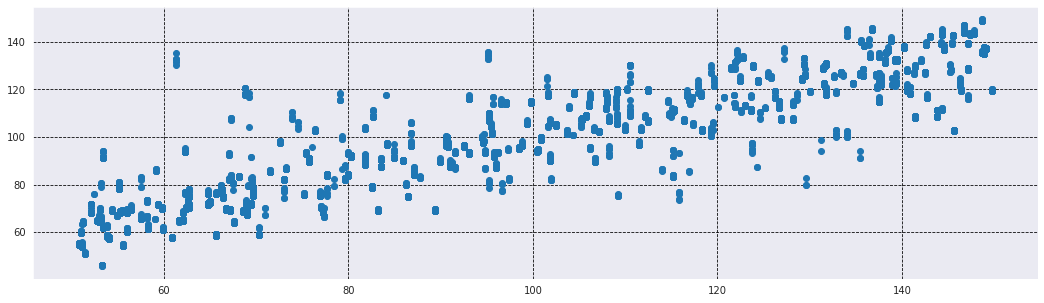

In [642]:
# Plot predicted vs actual values
plt.figure(figsize=(18,5))
plt.scatter(y_test, gbr.predict(X_test))
plt.grid(color='black',linestyle='--')
plt.show()

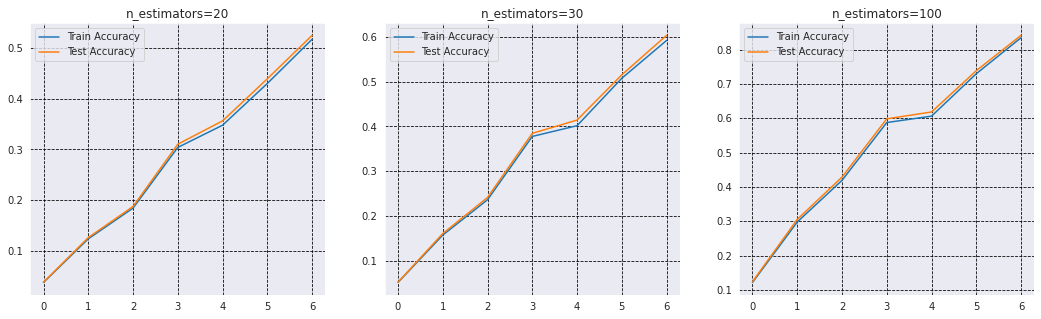

In [643]:
# Plot the training vs testing score against learning rate for different estimators.

plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.plot(train_score[:7], label='Train Accuracy')
plt.plot(test_score[:7], label='Test Accuracy')
plt.title('n_estimators=20')
plt.grid(color='black',linestyle='--')
plt.legend()

plt.subplot(1,3,2)
plt.plot(train_score[7:14], label='Train Accuracy')
plt.plot(test_score[7:14], label='Test Accuracy')
plt.title('n_estimators=30')
plt.grid(color='black',linestyle='--')
plt.legend()

plt.subplot(1,3,3)
plt.plot(train_score[14:21], label='Train Accuracy')
plt.plot(test_score[14:21], label='Test Accuracy')
plt.title('n_estimators=100')
plt.grid(color='black',linestyle='--')
plt.legend()
plt.show()


In [603]:
# Hyperparameter tuning of learning rate with n_estimators = 200. Since GBR model are considered as
# robust to the overfitting

learning_rates = [0.01, 0.05, 0.1, 0.25, 0.30, 0.50,0.75]
estimators = [200]

train_score = []
test_score = []
for n_estimator in estimators:
    for eta in learning_rates:
        print('Estimators and learning rate: ', n_estimator, eta)
        gbr = GradientBoostingRegressor(n_estimators=n_estimator,
                                       max_depth=2,
                                       learning_rate=eta,
                                       max_features=None)
        gbr.fit(X_train, y_train)
        print("Model Train Accuracy: %.3f" % gbr.score(X_train, y_train))
        print("Model Test Accuracy: %.3f" % gbr.score(X_test, y_test))
        train_score.append(gbr.score(X_train, y_train))
        test_score.append(gbr.score(X_test, y_test))
        print('-----------------------------------------------------------')

Estimators and learning rate:  200 0.01
Model Train Accuracy: 0.180
Model Test Accuracy: 0.184
-----------------------------------------------------------
Estimators and learning rate:  200 0.05
Model Train Accuracy: 0.410
Model Test Accuracy: 0.420
-----------------------------------------------------------
Estimators and learning rate:  200 0.1
Model Train Accuracy: 0.524
Model Test Accuracy: 0.536
-----------------------------------------------------------
Estimators and learning rate:  200 0.25
Model Train Accuracy: 0.695
Model Test Accuracy: 0.705
-----------------------------------------------------------
Estimators and learning rate:  200 0.3
Model Train Accuracy: 0.736
Model Test Accuracy: 0.747
-----------------------------------------------------------
Estimators and learning rate:  200 0.5
Model Train Accuracy: 0.851
Model Test Accuracy: 0.857
-----------------------------------------------------------
Estimators and learning rate:  200 0.75
Model Train Accuracy: 0.907
Model

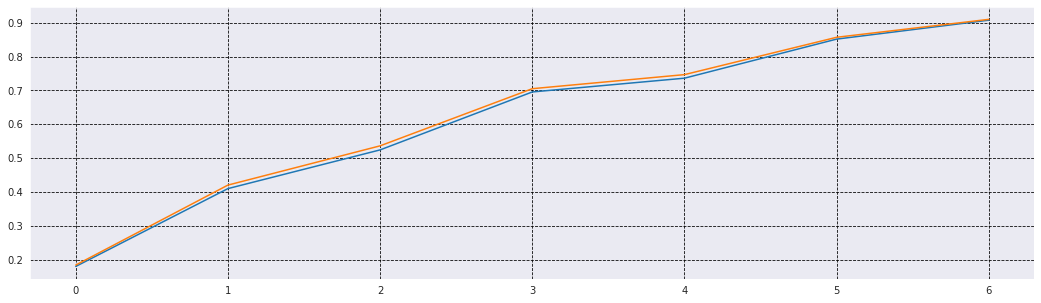

In [631]:
# Plot train vs test score against learning rate
plt.figure(figsize=(18,5))
plt.plot(train_score)
plt.plot(test_score)
plt.grid(color='black',linestyle='--')
plt.show()

In [607]:
# Build the model with best params
gbr = GradientBoostingRegressor(n_estimators=200,
                                max_depth=2,
                                learning_rate=0.75).fit(X_train, y_train)

In [608]:
# Evaluate the model
gbr.score(X_test, y_test)

0.9097337178822861

In [609]:
# Plot the error fall rate w.r.t the number of estimators.

# Loop for the best number
errors = [ mse(y_test, preds) for preds in gbr.staged_predict(X_test)]
# Optimal number of estimators
optimal_num_estimators = np.argmin(errors) + 1

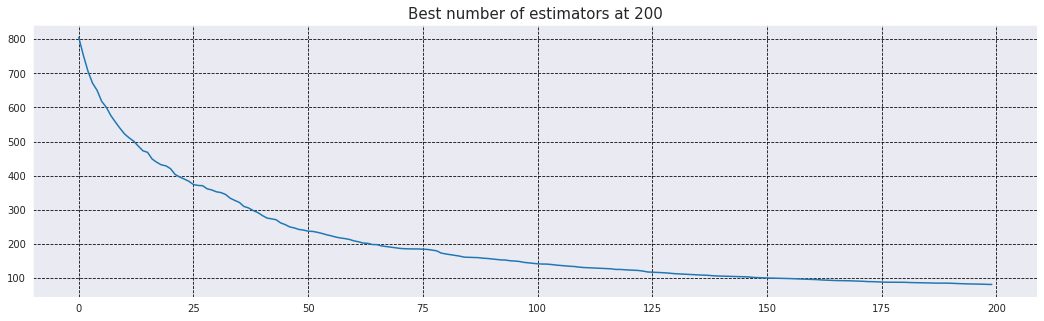

In [632]:
# Plot the error fall rate w.r.t the number of estimators.

plt.figure(figsize=(18,5))
g=sns.lineplot(x=range(200), y=errors)
g.set_title(f'Best number of estimators at {optimal_num_estimators}', size=15);
plt.grid(color='black',linestyle='--')

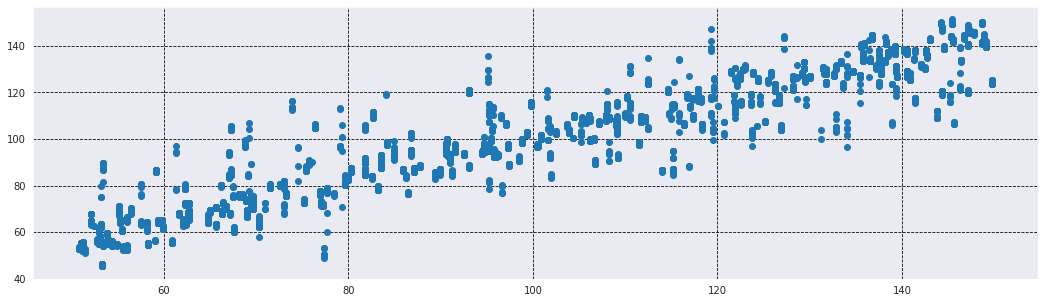

In [633]:
# Plot the scatter plot of actual vs predicted values

plt.figure(figsize=(18,5))
plt.scatter(y_test, gbr.predict(X_test))
plt.grid(color='black',linestyle='--')
plt.show()

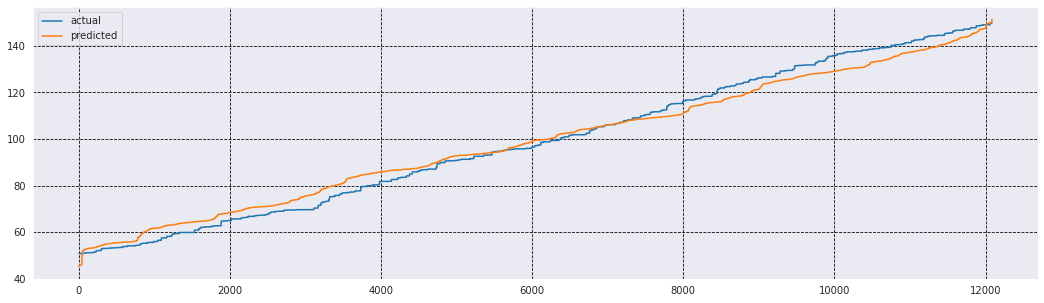

In [634]:
# Plot actual vs predicted score line

plt.figure(figsize=(18,5))
plt.plot(sorted(y_test.values), label='actual')
plt.plot(sorted(gbr.predict(X_test)),label='predicted')
plt.legend()
plt.grid(color='black',linestyle='--')
plt.show()

In [644]:
# Get the feature importance

get_featureImportance(gbr, X_train)

,features,importance
86,education_Partial College,0.082650
85,store_cost,0.050719
60,coffee_bar,0.049342
78,brand_brand98,0.045945
91,foodcat_foodcat100,0.041304
87,member_card_Golden,0.040357
59,store_city_Orizaba,0.038907
7,grocery_sqft,0.032610
8,frozen_sqft,0.032310
80,education_Partial High School,0.032267


In [122]:
#Performance Metrics

In [38]:
#rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# {'bootstrap': True,
#  'ccp_alpha': 0.0,
#  'criterion': 'squared_error',
#  'max_depth': None,
#  'max_features': 1.0,
#  'max_leaf_nodes': None,
#  'max_samples': None,
#  'min_impurity_decrease': 0.0,
#  'min_samples_leaf': 1,
#  'min_samples_split': 2,
#  'min_weight_fraction_leaf': 0.0,
#  'n_estimators': 100,
#  'n_jobs': None,
#  'oob_score': False,
#  'random_state': 42,
#  'verbose': 0,
#  'warm_start': False}
# MAE  :  0.052
# RMSE :  0.777
# MAPE :  0.0
# R2   :  0.999
#---------------------------------------
# Tune1_CV_rfr
# Best Params :  {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 42}
# Best Score  :  0.2836687384522831
#---------------------------------------
# Tune2_CV_rfr
# Best Params :  {'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 400, 'random_state': 42}
# Best Score  :  0.5285643714198018
#---------------------------------------
# Tune3_CV_rfr
# Best Params :  {'max_depth': 17, 'max_features': 'sqrt', 'n_estimators': 400, 'random_state': 42}
# Best Score  :  0.7238236920250244
#---------------------------------------
# Tune4_CV_rfr
# Best Params :  {'max_depth': 22, 'max_features': 'sqrt', 'n_estimators': 400, 'random_state': 42}
# Best Score  :  0.8524154352766298
#---------------------------------------
#Tune5_CV_rfr
# Best Params :  {'max_depth': 27, 'max_features': 'sqrt', 'n_estimators': 400, 'random_state': 42}
# Best Score  :  0.924993995441682
#---------------------------------------
# Tune6_CV_rfr
# Best Params :  {'max_depth': 32, 'max_features': 'sqrt', 'n_estimators': 400, 'random_state': 42}
# Best Score  :  0.9580197645194382
#---------------------------------------
# Tune7_CV_rfr
# Best Params :  {'max_depth': 37, 'max_features': 'sqrt', 'n_estimators': 500, 'random_state': 42}
# Best Score  :  0.9719205347790275
#---------------------------------------
# With all features
# Sparcity Ratio      : 0.0
# X_train.shape       : (48342, 22)
# X_test.shape        : (12086, 22)
# Time taken to train :  0:03:41.249400
# Best Params         :  {'max_depth': 3, 'n_estimators': 1000, 'random_state': 42}
# Best Score          :  0.04339776274497629
# -----------------------------------------------------------------
# Sparcity Ratio      : 0.1
# X_train.shape       : (48342, 41)
# X_test.shape        : (12086, 41)
# Time taken to train :  0:03:57.629907
# Best Params         :  {'max_depth': 3, 'n_estimators': 1000, 'random_state': 42}
# Best Score          :  0.04338101771266105
# -----------------------------------------------------------------
# Sparcity Ratio      : 0.2
# X_train.shape       : (48342, 60)
# X_test.shape        : (12086, 60)
# Time taken to train :  0:04:59.134900
# Best Params         :  {'max_depth': 3, 'n_estimators': 1000, 'random_state': 42}
# Best Score          :  0.04337484661792481
# -----------------------------------------------------------------
# Sparcity Ratio      : 0.30000000000000004
# X_train.shape       : (48342, 79)
# X_test.shape        : (12086, 79)
# Time taken to train :  0:05:43.398493
# Best Params         :  {'max_depth': 3, 'n_estimators': 1000, 'random_state': 42}
# Best Score          :  0.04337566515933413
# -----------------------------------------------------------------
# Sparcity Ratio      : 0.4
# X_train.shape       : (48342, 98)
# X_test.shape        : (12086, 98)
# Time taken to train :  0:05:37.596610
# Best Params         :  {'max_depth': 3, 'n_estimators': 1000, 'random_state': 42}
# Best Score          :  0.05337115570468045
# -----------------------------------------------------------------
# Sparcity Ratio      : 0.5
# X_train.shape       : (48342, 118)
# X_test.shape        : (12086, 118)
# Time taken to train :  0:06:21.379349
# Best Params         :  {'max_depth': 3, 'n_estimators': 1000, 'random_state': 42}
# Best Score          :  0.06610470952969091
# -----------------------------------------------------------------
# Sparcity Ratio      : 0.6000000000000001
# X_train.shape       : (48342, 137)
# X_test.shape        : (12086, 137)
# Time taken to train :  0:07:40.113556
# Best Params         :  {'max_depth': 3, 'n_estimators': 1000, 'random_state': 42}
# Best Score          :  0.09072852994147787
# -----------------------------------------------------------------
# Sparcity Ratio      : 0.7000000000000001
# X_train.shape       : (48342, 156)
# X_test.shape        : (12086, 156)
# Time taken to train :  0:08:05.285100
# Best Params         :  {'max_depth': 3, 'n_estimators': 1000, 'random_state': 42}
# Best Score          :  0.0940164293404629
# -----------------------------------------------------------------
# Sparcity Ratio      : 0.8
# X_train.shape       : (48342, 175)
# X_test.shape        : (12086, 175)
# Time taken to train :  0:09:20.789542
# Best Params         :  {'max_depth': 3, 'n_estimators': 1000, 'random_state': 42}
# Best Score          :  0.09401953699871293
# -----------------------------------------------------------------
# # without food category/food department/food family
# Sparcity Ratio      : 0.0
# X_train.shape       : (48342, 22)
# X_test.shape        : (12086, 22)
# Time taken to train :  0:03:38.958893
# Best Params         :  {'max_depth': 3, 'n_estimators': 1000, 'random_state': 42}
# Best Score          :  0.05439928131817804
# -----------------------------------------------------------------
# Sparcity Ratio      : 0.1
# X_train.shape       : (48342, 34)
# X_test.shape        : (12086, 34)
# Time taken to train :  0:03:52.198047
# Best Params         :  {'max_depth': 3, 'n_estimators': 1000, 'random_state': 42}
# Best Score          :  0.05249012398686139
# -----------------------------------------------------------------
# Sparcity Ratio      : 0.2
# X_train.shape       : (48342, 46)
# X_test.shape        : (12086, 46)
# Time taken to train :  0:04:06.111863
# Best Params         :  {'max_depth': 3, 'n_estimators': 1000, 'random_state': 42}
# Best Score          :  0.06610745675539649
# -----------------------------------------------------------------
# Sparcity Ratio      : 0.30000000000000004
# X_train.shape       : (48342, 58)
# X_test.shape        : (12086, 58)
# Time taken to train :  0:04:21.670502
# Best Params         :  {'max_depth': 3, 'n_estimators': 1000, 'random_state': 42}
# Best Score          :  0.0748590299515169
# -----------------------------------------------------------------
# Sparcity Ratio      : 0.4
# X_train.shape       : (48342, 70)
# X_test.shape        : (12086, 70)
# Time taken to train :  0:04:41.747239
# Best Params         :  {'max_depth': 3, 'n_estimators': 1000, 'random_state': 42}
# Best Score          :  0.09073485418088242
# -----------------------------------------------------------------
# Sparcity Ratio      : 0.5
# X_train.shape       : (48342, 83)
# X_test.shape        : (12086, 83)
# Time taken to train :  0:05:27.762474
# Best Params         :  {'max_depth': 3, 'n_estimators': 1000, 'random_state': 42}
# Best Score          :  0.09402107861741171
# -----------------------------------------------------------------
# Sparcity Ratio      : 0.6000000000000001
# X_train.shape       : (48342, 95)
# X_test.shape        : (12086, 95)
# Time taken to train :  0:06:06.103000
# Best Params         :  {'max_depth': 3, 'n_estimators': 1000, 'random_state': 42}
# Best Score          :  0.0940244077244469
# -----------------------------------------------------------------
# Sparcity Ratio      : 0.7000000000000001
# X_train.shape       : (48342, 107)
# X_test.shape        : (12086, 107)
# Time taken to train :  0:07:08.236353
# Best Params         :  {'max_depth': 3, 'n_estimators': 1000, 'random_state': 42}
# Best Score          :  0.09402436631724083
# -----------------------------------------------------------------
# Sparcity Ratio      : 0.8
# X_train.shape       : (48342, 119)
# X_test.shape        : (12086, 119)
# Time taken to train :  0:09:00.644499
# Best Params         :  {'max_depth': 3, 'n_estimators': 1000, 'random_state': 42}
# Best Score          :  0.10045574849410246
# -----------------------------------------------------------------
# without
#Sales country
#gender
#education
#member_card
#occupation
#houseowner
#store_type
#store_city
# Sparcity Ratio      : 0.0
# X_train.shape       : (48342, 22)
# X_test.shape        : (12086, 22)
# Time taken to train :  0:03:28.207133
# Best Params         :  {'max_depth': 3, 'n_estimators': 1000, 'random_state': 42}
# Best Score          :  0.05439928131817804
# -----------------------------------------------------------------
# Sparcity Ratio      : 0.1
# X_train.shape       : (48342, 29)
# X_test.shape        : (12086, 29)
# Time taken to train :  0:04:21.023282
# Best Params         :  {'max_depth': 3, 'n_estimators': 1000, 'random_state': 42}
# Best Score          :  0.05344629591285026
# -----------------------------------------------------------------
# Sparcity Ratio      : 0.2
# X_train.shape       : (48342, 37)
# X_test.shape        : (12086, 37)
# Time taken to train :  0:07:06.547827
# Best Params         :  {'max_depth': 3, 'n_estimators': 1000, 'random_state': 42}
# Best Score          :  0.052491039933341546
# -----------------------------------------------------------------
# Sparcity Ratio      : 0.30000000000000004
# X_train.shape       : (48342, 45)
# X_test.shape        : (12086, 45)
# Time taken to train :  0:06:53.097841
# Best Params         :  {'max_depth': 3, 'n_estimators': 1000, 'random_state': 42}
# Best Score          :  0.06610724734185476
# -----------------------------------------------------------------
# Sparcity Ratio      : 0.4
# X_train.shape       : (48342, 53)
# X_test.shape        : (12086, 53)
# Time taken to train :  0:05:59.481745
# Best Params         :  {'max_depth': 3, 'n_estimators': 1000, 'random_state': 42}
# Best Score          :  0.0748589373403867
# -----------------------------------------------------------------
# Sparcity Ratio      : 0.5
# X_train.shape       : (48342, 61)
# X_test.shape        : (12086, 61)
# Time taken to train :  0:07:26.279064
# Best Params         :  {'max_depth': 3, 'n_estimators': 1000, 'random_state': 42}
# Best Score          :  0.07485905165103827
# -----------------------------------------------------------------
# Sparcity Ratio      : 0.6000000000000001
# X_train.shape       : (48342, 68)
# X_test.shape        : (12086, 68)
# Time taken to train :  0:07:28.300434
# Best Params         :  {'max_depth': 3, 'n_estimators': 1000, 'random_state': 42}
# Best Score          :  0.09073482596013378
# -----------------------------------------------------------------
# Sparcity Ratio      : 0.7000000000000001
# X_train.shape       : (48342, 76)
# X_test.shape        : (12086, 76)
# Time taken to train :  0:05:28.627371
# Best Params         :  {'max_depth': 3, 'n_estimators': 1000, 'random_state': 42}
# Best Score          :  0.09453413758839453
# -----------------------------------------------------------------
# Sparcity Ratio      : 0.8
# X_train.shape       : (48342, 84)
# X_test.shape        : (12086, 84)
# Time taken to train :  0:05:51.268741
# Best Params         :  {'max_depth': 3, 'n_estimators': 1000, 'random_state': 42}
# Best Score          :  0.10722245481377093
# -----------------------------------------------------------------
# After target encoding and binning of food_category, promotion_name and brand_name
# Time taken to train :  0:12:55.168316
# Best Params         :  {'max_depth': 5, 'n_estimators': 1000, 'random_state': 42}
# Best Score          :  0.29869966674528015
# -----------------------------------------------------------------
# 100 0.01
# Model Train Accuracy: 0.122
# Model Test Accuracy: 0.124
# 100 0.05
# Model Train Accuracy: 0.298
# Model Test Accuracy: 0.305
# 100 0.1
# Model Train Accuracy: 0.419
# Model Test Accuracy: 0.428
# 100 0.15
# Model Train Accuracy: 0.493
# Model Test Accuracy: 0.506
# 100 0.2
# Model Train Accuracy: 0.535
# Model Test Accuracy: 0.544
# 100 0.25
# Model Train Accuracy: 0.587
# Model Test Accuracy: 0.598
# 100 0.3
# Model Train Accuracy: 0.606
# Model Test Accuracy: 0.618
# 300 0.01
# Model Train Accuracy: 0.224
# Model Test Accuracy: 0.229
# 300 0.05
# Model Train Accuracy: 0.472
# Model Test Accuracy: 0.484
# 300 0.1
# Model Train Accuracy: 0.590
# Model Test Accuracy: 0.601
# 300 0.15
# Model Train Accuracy: 0.650
# Model Test Accuracy: 0.660
# 300 0.2
# Model Train Accuracy: 0.718
# Model Test Accuracy: 0.724
# 300 0.25
# Model Train Accuracy: 0.766
# Model Test Accuracy: 0.774
# 300 0.3
# Model Train Accuracy: 0.822
# Model Test Accuracy: 0.829
# 500 0.01
# Model Train Accuracy: 0.291
# Model Test Accuracy: 0.298
# 500 0.05
# Model Train Accuracy: 0.545
# Model Test Accuracy: 0.557
# 500 0.1
# Model Train Accuracy: 0.657
# Model Test Accuracy: 0.668
# 500 0.15
# Model Train Accuracy: 0.764
# Model Test Accuracy: 0.774
# 500 0.2
# Model Train Accuracy: 0.821
# Model Test Accuracy: 0.827
# 500 0.25
# Model Train Accuracy: 0.854
# Model Test Accuracy: 0.858
# 500 0.3
# Model Train Accuracy: 0.881
# Model Test Accuracy: 0.885